# Additional Information (Dicoding Profile):

- User profile:
 - **Full name:** Aditya Dwi Nugraha
 - **Username:** aditya_dwi_10
 - **Email:** adityadwinugraha.2021@gmail.com

Submission/Project has been completed with all requirements.

Final Project: Data Analysis of Bike Sharing Data Set (Analisis Data Kumpulan Data Berbagi Sepeda)

Class: Belajar Analisis Data dengan Python

Bike Sharing Dataset: [
    "day.csv",
    "hour.csv"
]

Created by: Aditya Dwi Nugraha

© Copyright 2024 All Right Reserved by Aditya Dwi Nugraha

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran peminjaman sepeda (count) berdasarkan musim (season)?
- Apakah ada korelasi antara suhu (temp) dan kelembaban udara (hum) dengan jumlah peminjaman sepeda (count)?

### Install Libary yang Digunakan

In [1]:
!pip install -U streamlit scipy pyarrow seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: seaborn
    Found exi

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import requests, os, json


In [3]:
# @title Download Dataset

try: os.makedirs("/content/Dataset")
except: pass

# URL file yang akan didownload
url = "https://drive.usercontent.google.com/u/0/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ&export=download"
local_zip_file = "Bike_sharing_dataset.zip"
dataset = "Dataset/Bike_sharing_dataset"

print(f"Downloading {local_zip_file}...")

try:
    # Download file zip dari URL
    response = requests.get(url)
    response.raise_for_status()  # Menangani kesalahan jika download gagal

    # Simpan file zip yang didownload
    with open(local_zip_file, "wb") as file:
        file.write(response.content)

    print(f"Download of {local_zip_file} completed.")

    print(f"Extracting {local_zip_file}...")

    # Buat folder "Dataset" jika belum ada
    if not os.path.exists(dataset): os.makedirs(dataset)

    # Ekstrak file zip ke folder "Dataset"
    !unzip -q /content/Bike_sharing_dataset.zip -d /content/Dataset/Bike_sharing_dataset

    print(f"Extraction of {local_zip_file} completed.")

    # Hapus file zip setelah diekstrak
    os.remove(local_zip_file)

    print(f"Deleted {local_zip_file}.")

except requests.exceptions.RequestException as e:
    print(f"Error during download: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Download of Bike_sharing_dataset.zip completed.
Extracting Bike_sharing_dataset.zip...
Extraction of Bike_sharing_dataset.zip completed.
Deleted Bike_sharing_dataset.zip.


## Data Wrangling

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data

### Gathering Data

Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

Disini saya menggunakan Dataset "Bike_Sharing" maka saya akan mengambil file "day.csv" dan "hour.csv"

In [4]:
df = {}

# Loop melalui file dalam direktori dataset
for file in os.listdir(dataset):
    if file.endswith('.csv'):
        file_path = os.path.join(dataset, file)

        # Memuat data sesuai dengan nama file
        if 'day' in file: df["day"] = pd.read_csv(file_path)
        elif 'hour' in file: df["hour"] = pd.read_csv(file_path)

# Menampilkan 5 data teratas dari masing-masing dataframe
print("="*100, "\n", "="*100, "\n", "="*100, "\n", "Dataframe df index day:")
print(df["day"].head())

print("="*100, "\n", "="*100, "\n", "="*100, "\n", "Dataframe df index hour:")
print(df["hour"].head())

print("="*100, "\n", "="*100, "\n", "="*100, "\n", "Dataframe df all index:")
print(df)


 Dataframe df index day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
 

### Assessing Data

Menilai data day.csv dan hour.csv

1. Memeriksa Jenis data untuk setiap kolom

In [5]:
index = 0
for key in df:
    print(f"\nJenis data untuk setiap kolom ({key}):")
    print(df[key].info())

    if index == 0:
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)

    index += 1



Jenis data untuk setiap kolom (hour):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Jeni

 Dapat kita lihat bahwa dari tipe data yang telah ditampilkan dari output, semua kolom pada dataset day dan hour tampak memiliki tipe data yang tepat. Namun, ada Kolom "dteday" seharusnya memiliki tipe data datetime bukan object. Maka kita harus convert tipe data Kolom "dteday" object -> datetime

2. Memeriksa Jumlah data yang hilang di setiap kolom

In [6]:
index = 0
for key in df:
    print(f"\nJumlah data yang hilang di setiap kolom ({key}):")
    print(df[key].isnull().sum())

    if index == 0:
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)

    index += 1



Jumlah data yang hilang di setiap kolom (hour):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data yang hilang di setiap kolom (day):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dapat kita lihat bahwa tidak ada data yang hilang (missing data) dalam kolom-kolom dari dataset day dan hour. Semua kolom memiliki jumlah entri yang sama (0), yang menunjukkan bahwa dataset ini sudah bersih dari missing values.

3. Memeriksa Jumlah data yang duplikat di setiap kolom

In [7]:
for key in df:
    print(f"\nJumlah data yang duplikat di setiap kolom ({key}):")
    print(df[key].duplicated().sum())

    index += 1



Jumlah data yang duplikat di setiap kolom (hour):
0

Jumlah data yang duplikat di setiap kolom (day):
0


Dapat kita lihat bahwa tidak ada data yang duplikat dalam kedua dataset, baik dataset day.csv maupun dataset hour.csv

4. Memeriksa apakah ada keanehan pada nilai Statistik

In [8]:
index = 0
for key in df:
    print(f"\nStatistik deskriptif ({key}):")
    print(df[key].describe())

    if index == 0:
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)

    index += 1



Statistik deskriptif (hour):
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      

Dapat kita lihat dari statistik di atas terlihat tidak ada keanehan pada setiap nilai statistik

5. Memeriksa Distribusi Data dan Mengidentifikasi adanya Outlier dalam setiap kolom

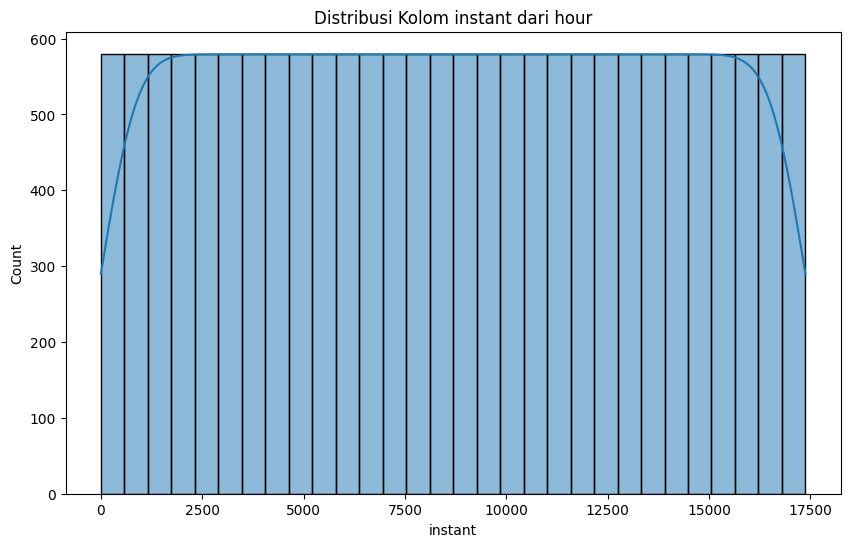

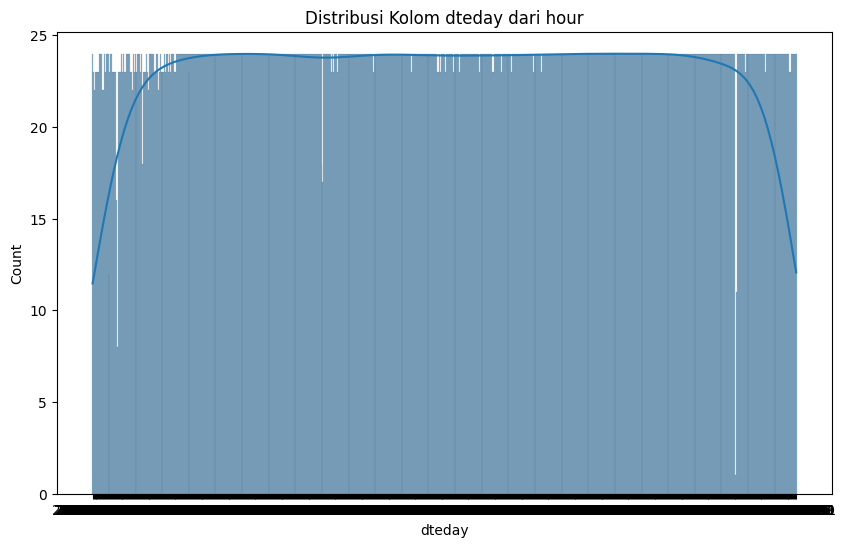

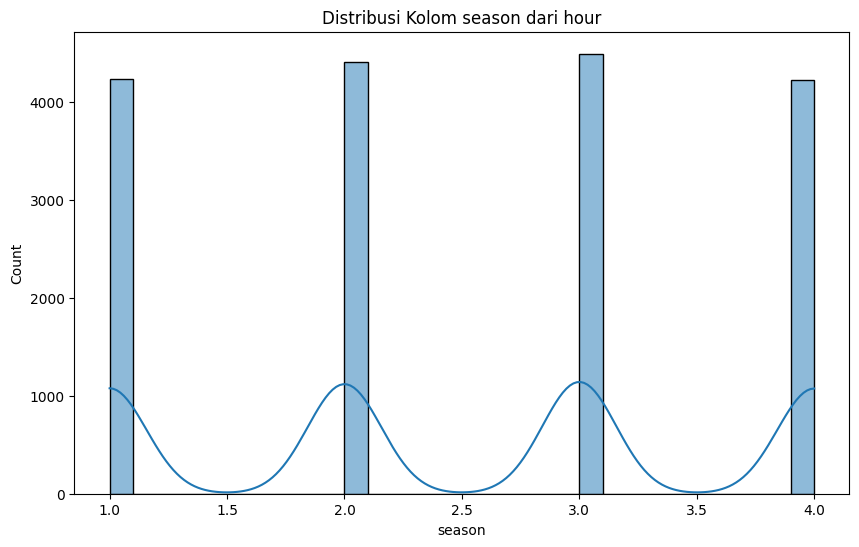

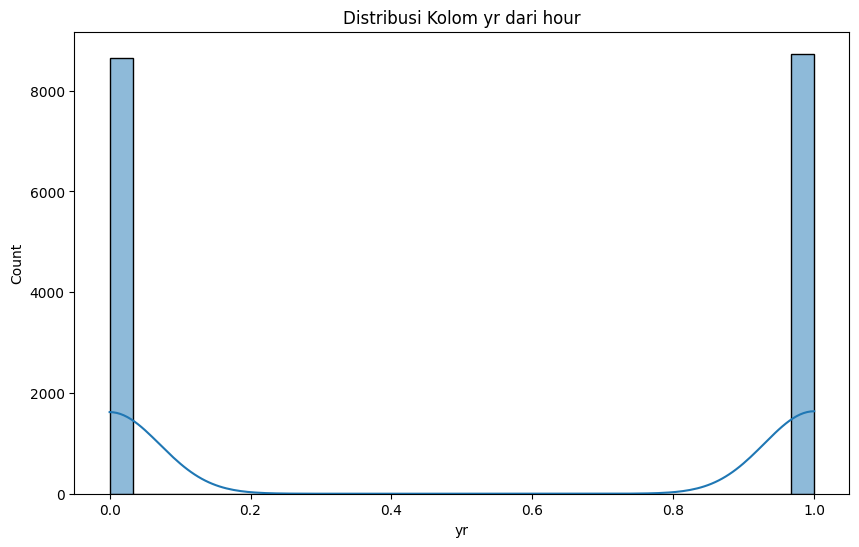

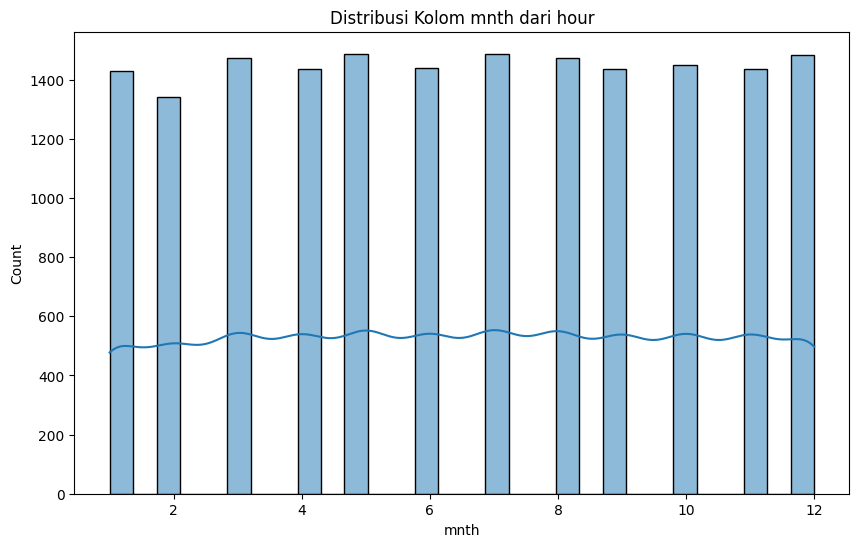

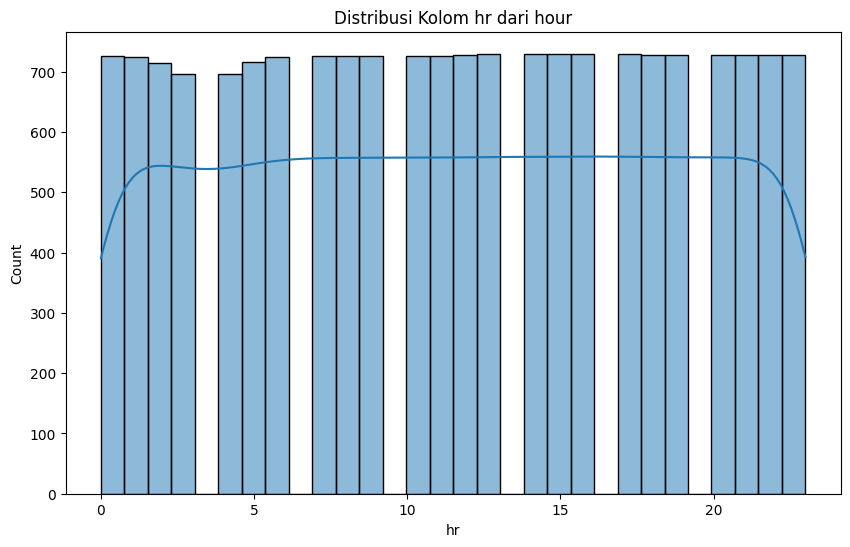

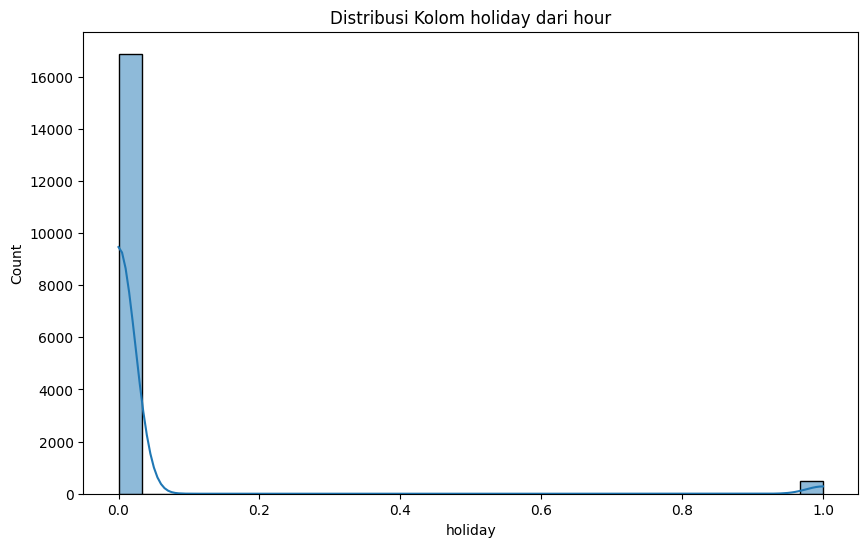

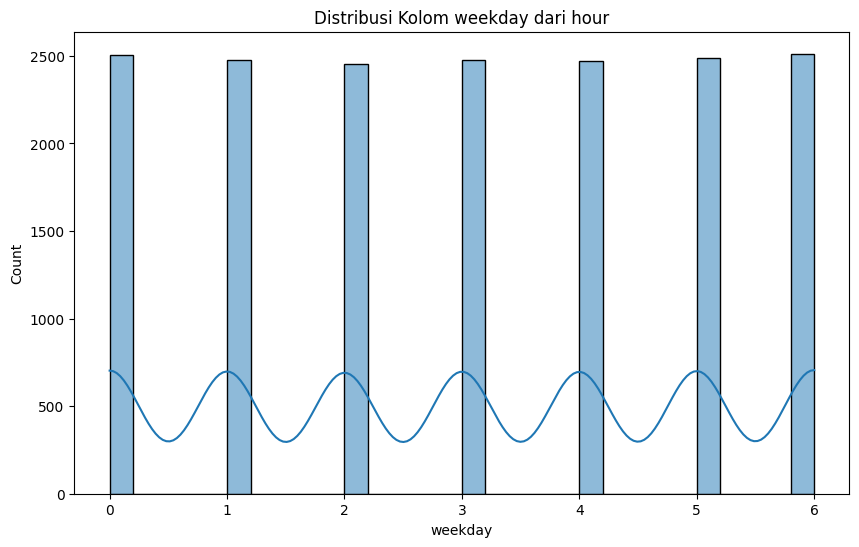

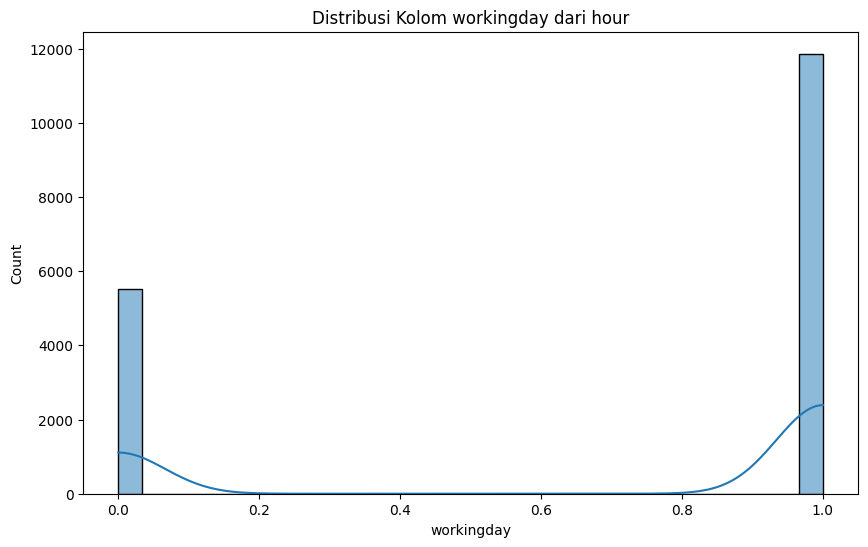

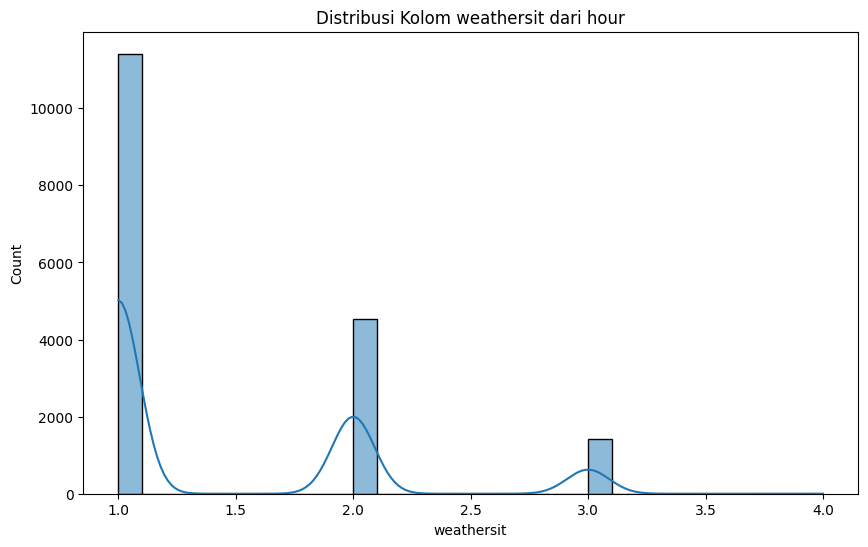

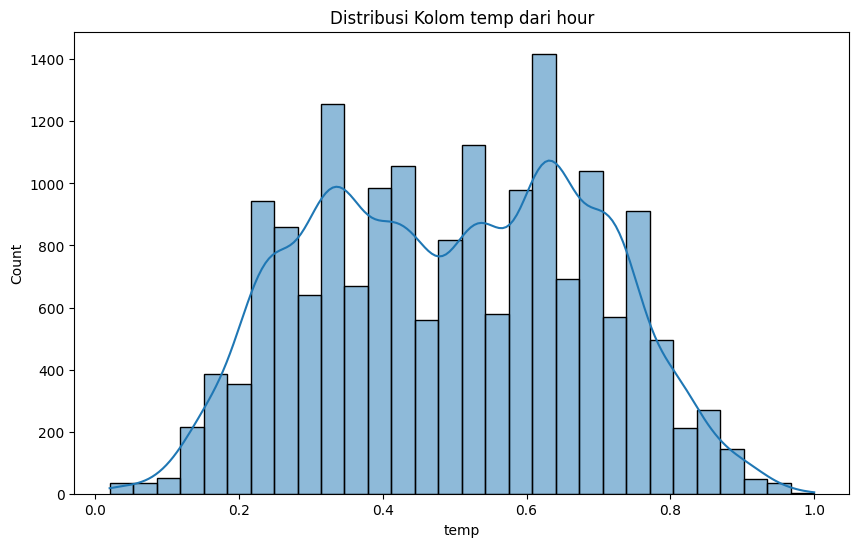

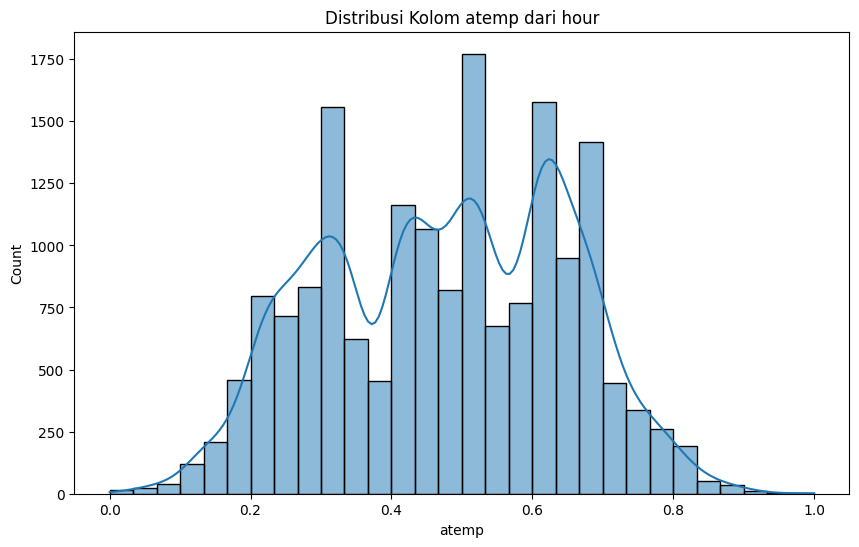

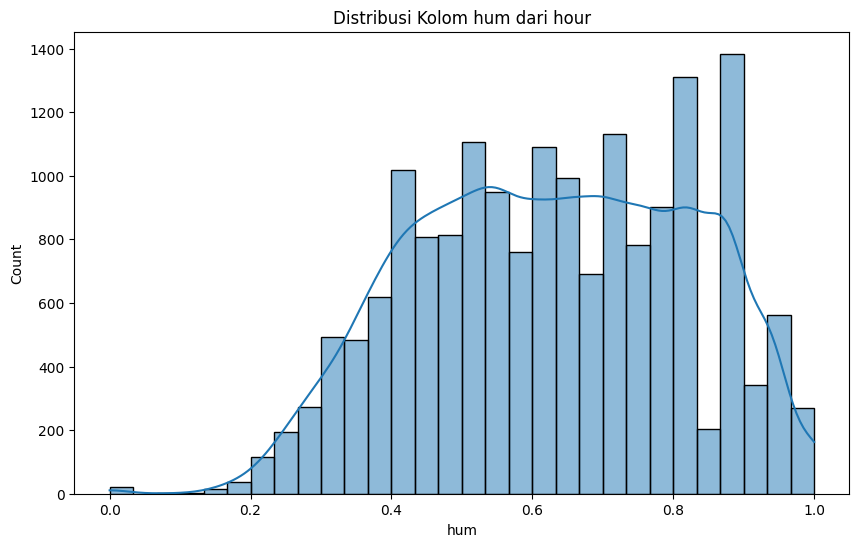

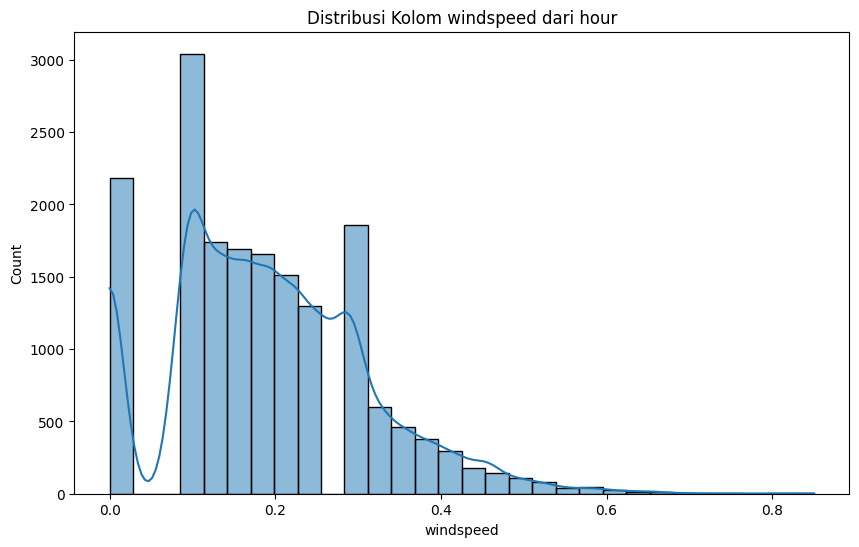

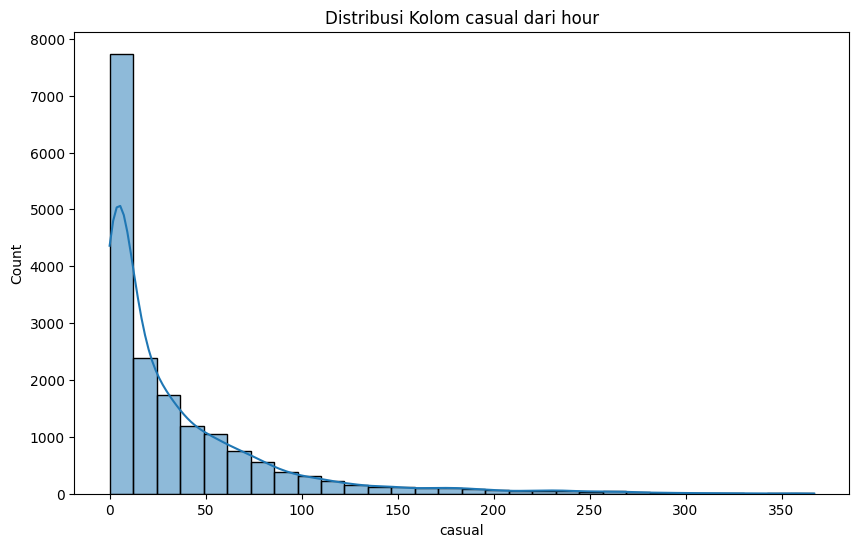

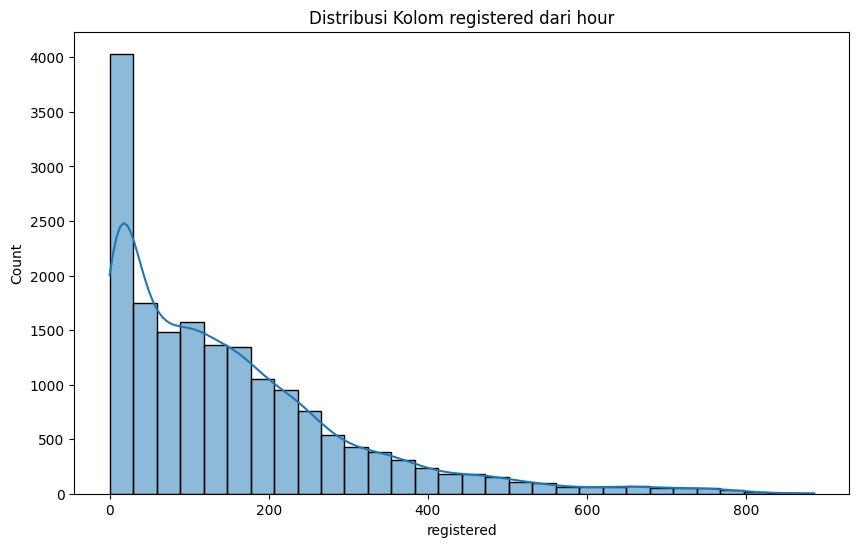

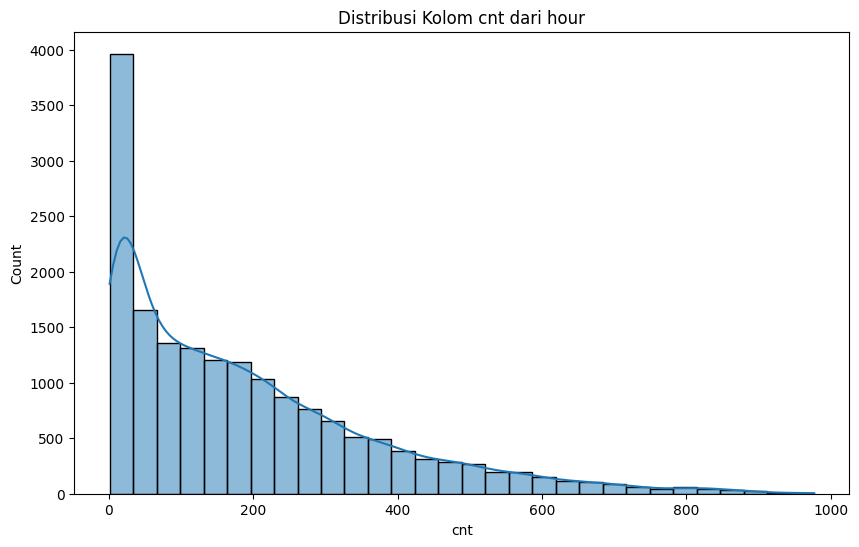

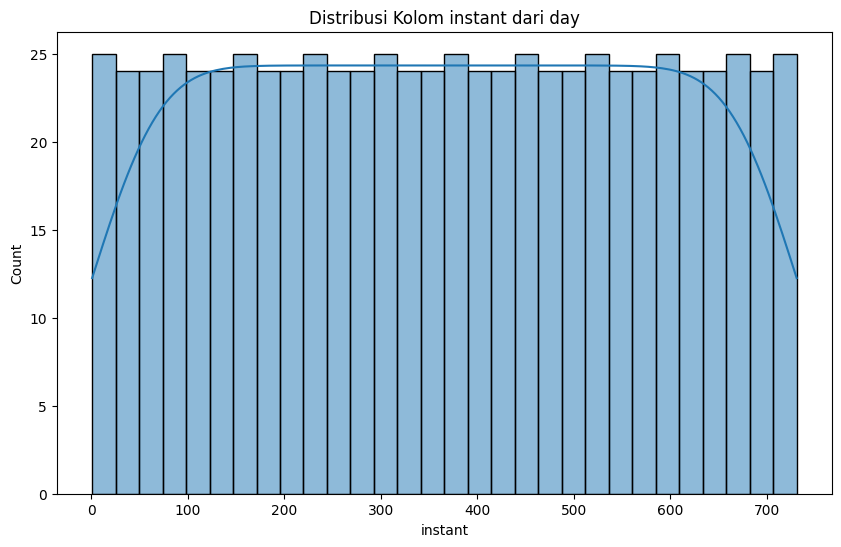

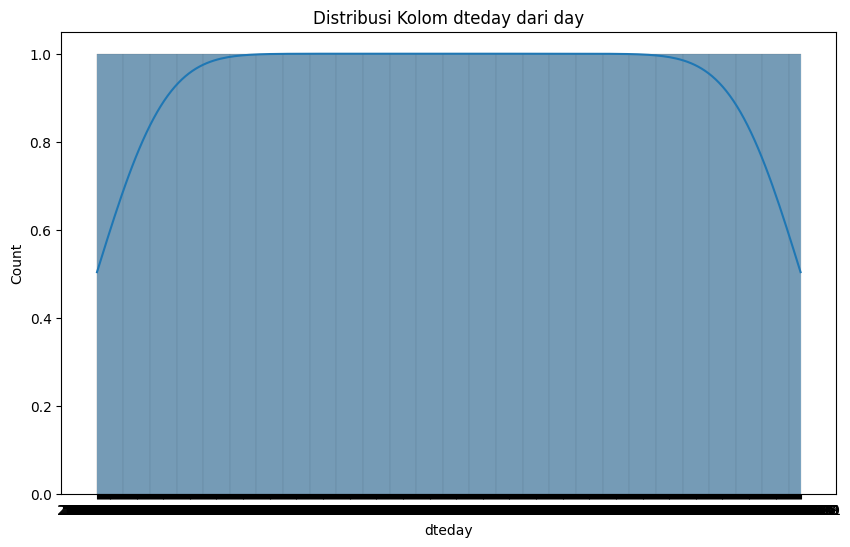

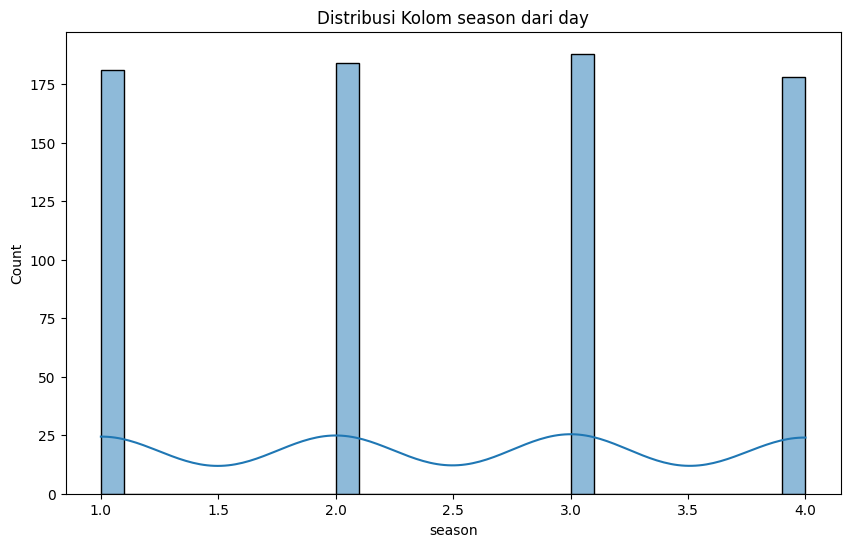

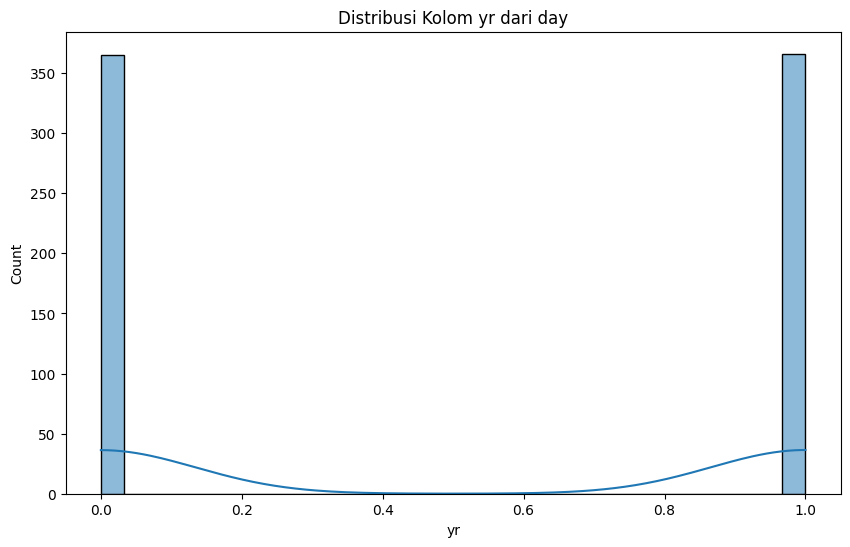

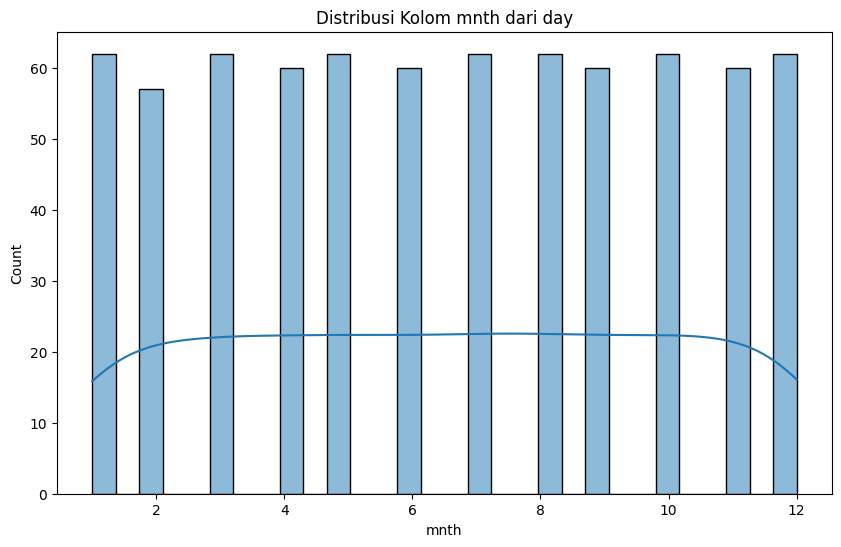

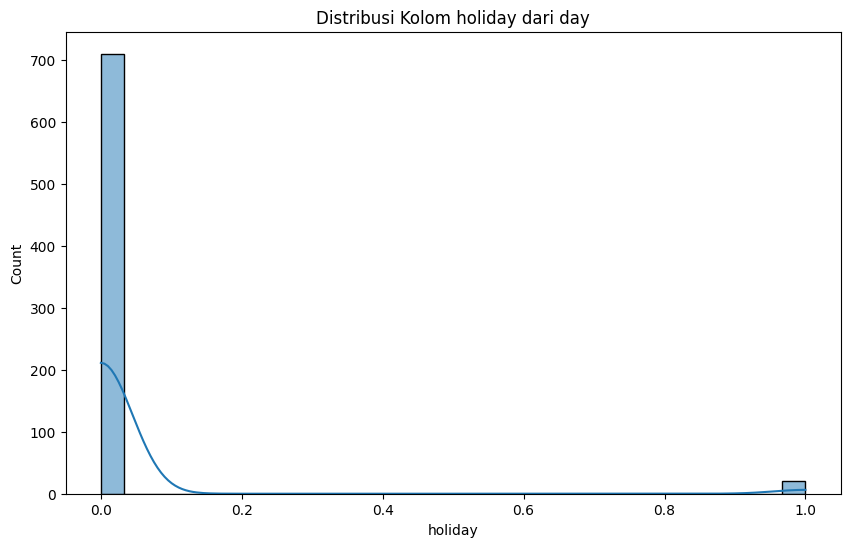

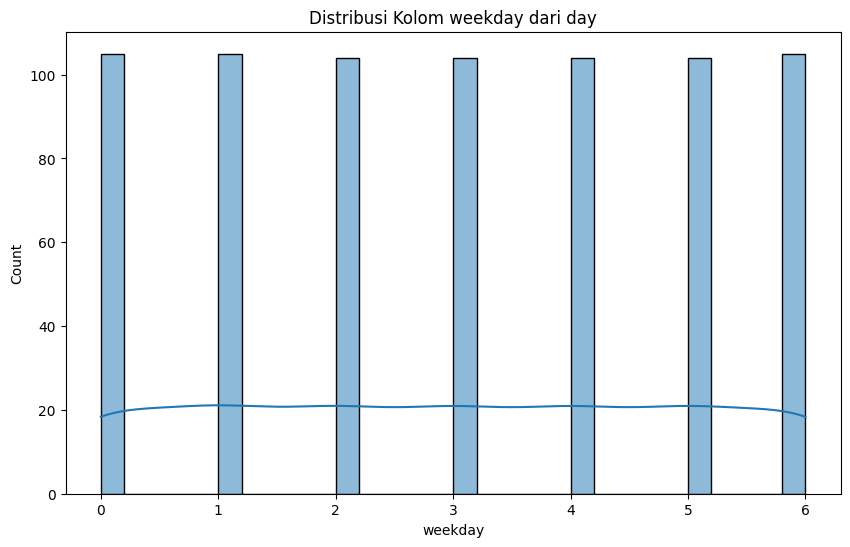

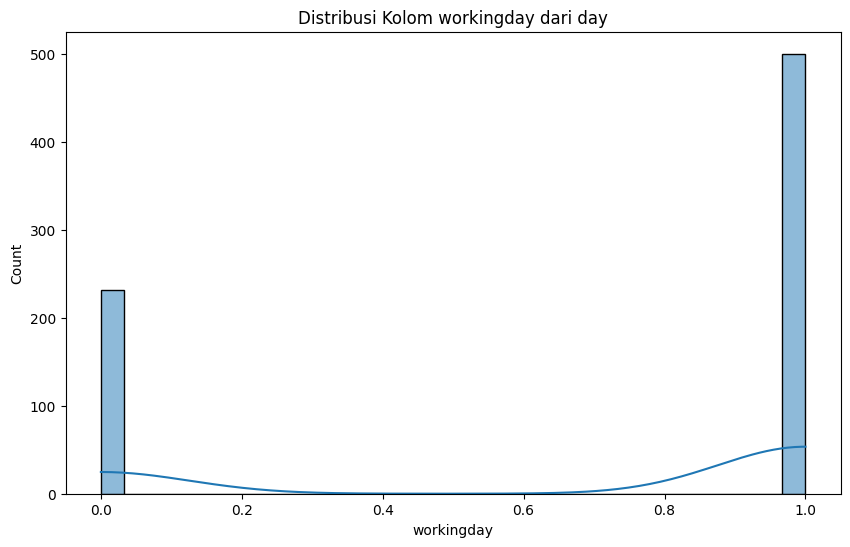

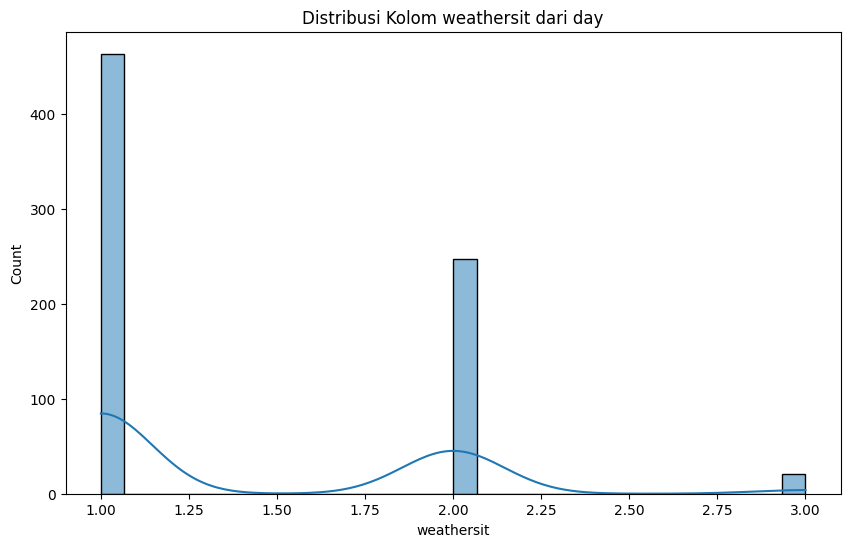

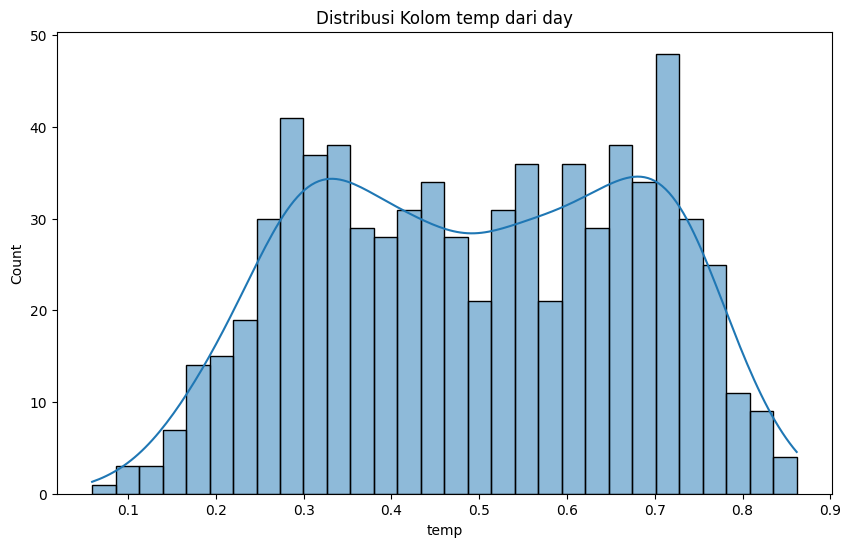

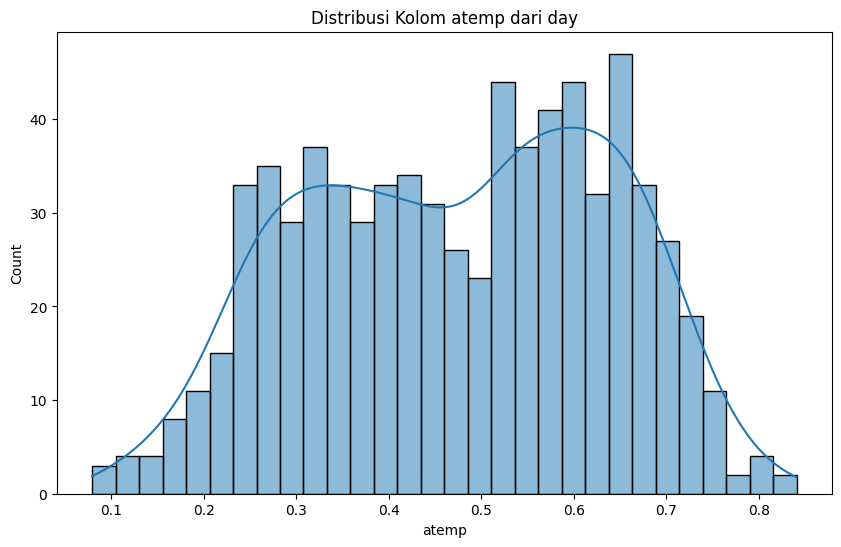

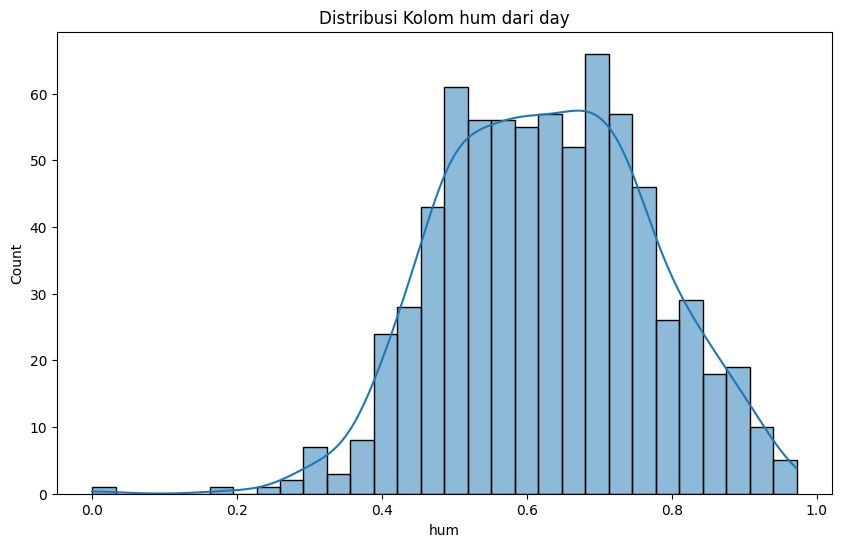

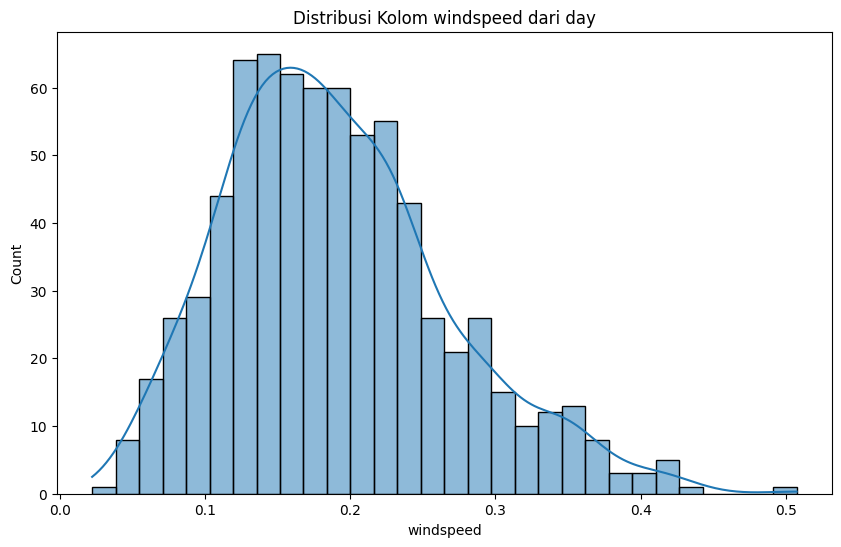

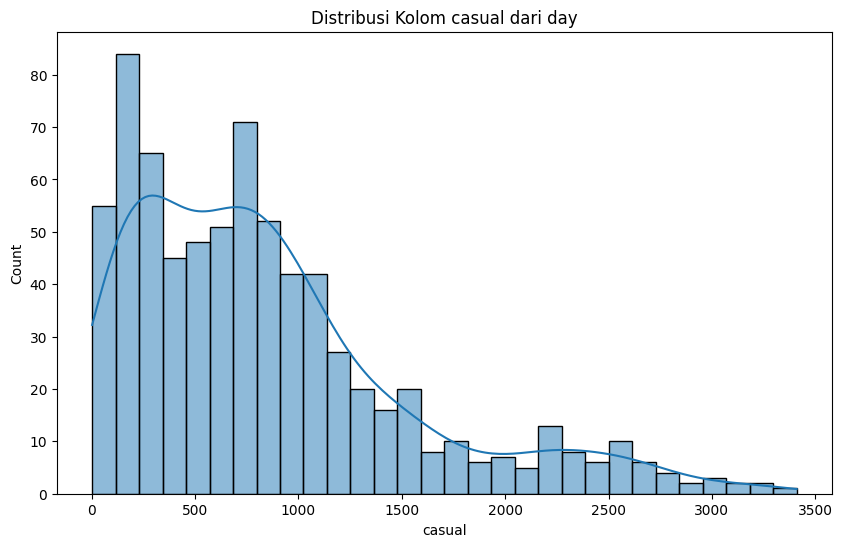

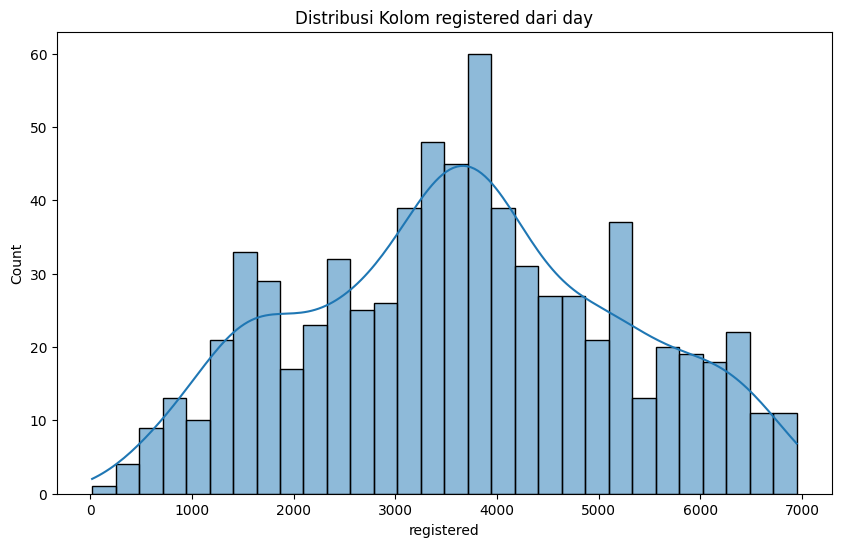

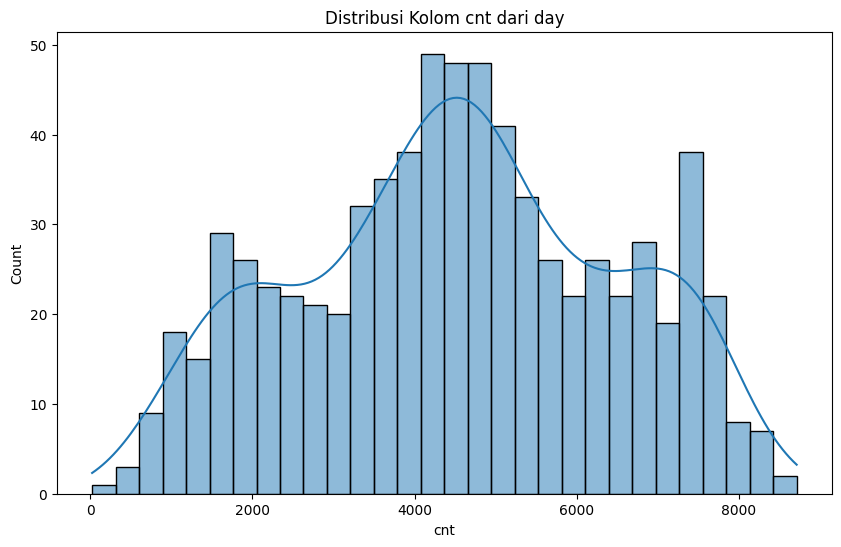

In [9]:
index = 0
for key in df:
    for column in df[key].columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[key][column], bins=30, kde=True)
        plt.title(f'Distribusi Kolom {column} dari {key}')
        plt.show()

    if index == 0:
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)

    index += 1


6. Memeriksa Matriks Korelisasi


Matriks Korelasi (hour):
             instant    dteday    season        yr      mnth        hr  \
instant     1.000000  0.999995  0.404046  0.866014  0.489164 -0.004775   
dteday      0.999995  1.000000  0.404452  0.865648  0.489808 -0.006161   
season      0.404046  0.404452  1.000000 -0.010742  0.830386 -0.006117   
yr          0.866014  0.865648 -0.010742  1.000000 -0.010473 -0.003867   
mnth        0.489164  0.489808  0.830386 -0.010473  1.000000 -0.005772   
hr         -0.004775 -0.006161 -0.006117 -0.003867 -0.005772  1.000000   
holiday     0.014723  0.014737 -0.009585  0.006692  0.018430  0.000479   
weekday     0.001357  0.001372 -0.002335 -0.004485  0.010400 -0.003498   
workingday -0.003416 -0.003366  0.013743 -0.002196 -0.003477  0.002285   
weathersit -0.014198 -0.014063 -0.014524 -0.019157  0.005400 -0.020203   
temp        0.136178  0.136074  0.312025  0.040913  0.201691  0.137603   
atemp       0.137615  0.137543  0.319380  0.039222  0.208096  0.133750   
hum         

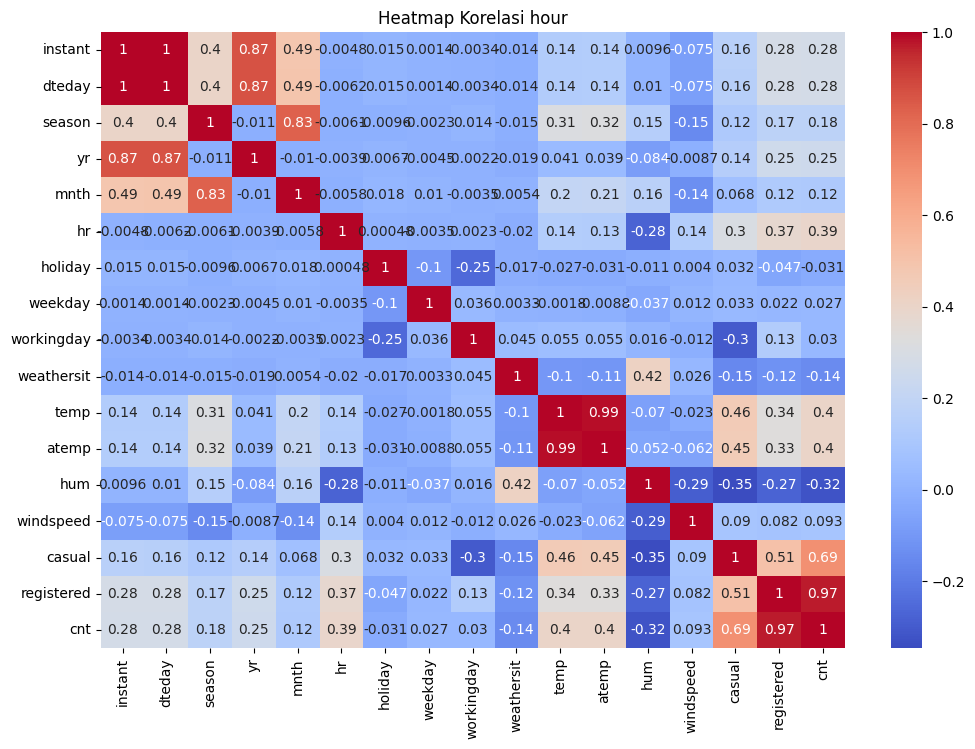


Matriks Korelasi (day):
             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.016375  0.016375  0.205445 -0.110651  0.222204 -0.015937   
windspeed  -0

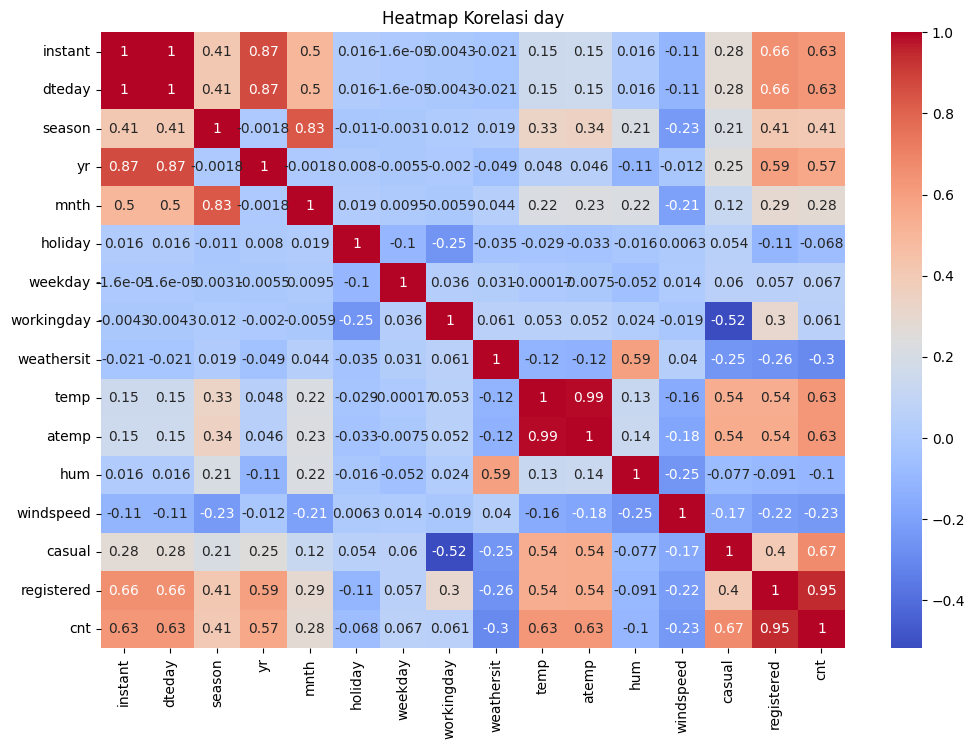

In [10]:
index = 0
for key in df:
    df[key]['dteday'] = pd.to_datetime(df[key]['dteday'])
    correlation_matrix = df[key].corr()
    print(f"\nMatriks Korelasi ({key}):")
    print(correlation_matrix)

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Heatmap Korelasi {key}')
    plt.show()

    if index == 0:
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)
        print("="*100)

    index += 1


### Cleaning Data

Membersihkan data day.csv dan Menghapus data hour.csv

1. Menghapus tabel yang tidak diperlukan

 Sebelum kita masuk ke tahapan-tahapan selanjutnya, kita akan menghapus tabel hour. Ini karena tabel ini tidak relevan dengan pertanyaan bisnis yang telah ditetapkan, dan perbedaan utamanya hanya terletak pada kolom hr, sedangkan informasi lainnya sama.

In [11]:
del df["hour"]
df_day = df["day"]
print(df_day.head())


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


2. Mennghapus Kolom yang tidak digunakan

 Berdasarkan pertanyaan bisnis yang ada, kami memilih untuk menghapus kolom berikut:

 - instant: Kolom ini hanya merupakan indeks catatan dan tidak memberikan informasi tambahan yang signifikan terkait pertanyaan bisnis yang sedang dipertimbangkan.

 - windspeed: Tidak ada pertanyaan bisnis yang menyoroti pengaruh kecepatan angin terhadap jumlah penyewa sepeda, sehingga kolom ini dianggap tidak relevan untuk analisis yang sedang dilakukan.

In [12]:
drop_col = ['instant', 'windspeed']

for i in df_day.columns:
  if i in drop_col: df_day.drop(labels=i, axis=1, inplace=True)

df_day.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Merename nama Judul Kolom day.csv dan Merubah tipe data

 Saya akan mengganti nama Judul Kolom day.csv agar mudah dibaca. Dan ada juga tipe data yang menurut saya tidak cocok, yang akan saya ubah agar lebih sesuai dengan kebutuhan analisis saya.

In [13]:
# Mengubah nama judul kolom agar lebih mudah dan jelas untuk dibaca
df_day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count',
    'hum': 'humidity'
}, inplace=True)

# Mengubah tipe data integer menjadi kategori agar lebih mudah dan jelas untuk dibaca
df_day['month'] = df_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_day['weather_cond'] = df_day['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Mengubah tipe data ke datetime
df_day['dateday'] = pd.to_datetime(df_day.dateday)

# Mengubaha tipe data dari numerik (int64/float64) ke kategorikal (category)
df_day['season'] = df_day.season.astype('category')
df_day['year'] = df_day.year.astype('category')
df_day['month'] = df_day.month.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weather_cond'] = df_day.weather_cond.astype('category')

df_day.head()


,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [14]:
df_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  humidity      731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


4. Menghapus duplikasi data dan menyimpan perubahan ke file baru

In [15]:
# Menghapus duplikasi
df_day = df_day.drop_duplicates()

# Menyimpan perubahan ke file baru
os.makedirs('Dataset_Cleaned', exist_ok=True)
cleaned_file_path = f'Dataset_Cleaned/day_cleaned.csv'  # Sesuaikan path sesuai kebutuhan Anda
df_day = pd.DataFrame(df_day)
df_day.to_csv(cleaned_file_path, index=False)


## Exploratory Data Analysis (EDA)

### Explore ...

1. Kategorisasi pengguna sepeda (baik casual dan registered).

In [18]:
# Pengelompokan dan agregasi untuk column1
column1 = ['month', 'weather_cond', 'holiday', 'weekday', 'workingday']
for col in column1:
    result = df_day.groupby(col, observed=True).agg({
        'count': ['max', 'min', 'mean', 'sum']
    })
    print(f"Agregasi untuk {col}:")
    print(result)
    print()

# Pengelompokan dan agregasi untuk column2
column2 = {
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean'],
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
}
for col, funcs in column2.items():
    result = df_day.groupby('season', observed=True).agg({col: funcs})
    print(f"Agregasi untuk '{col}' berdasarkan 'season':")
    print(result)
    print()


Agregasi untuk month:
      count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Agregasi untuk weather_cond:
                    count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Agregasi untuk holiday:
        count       

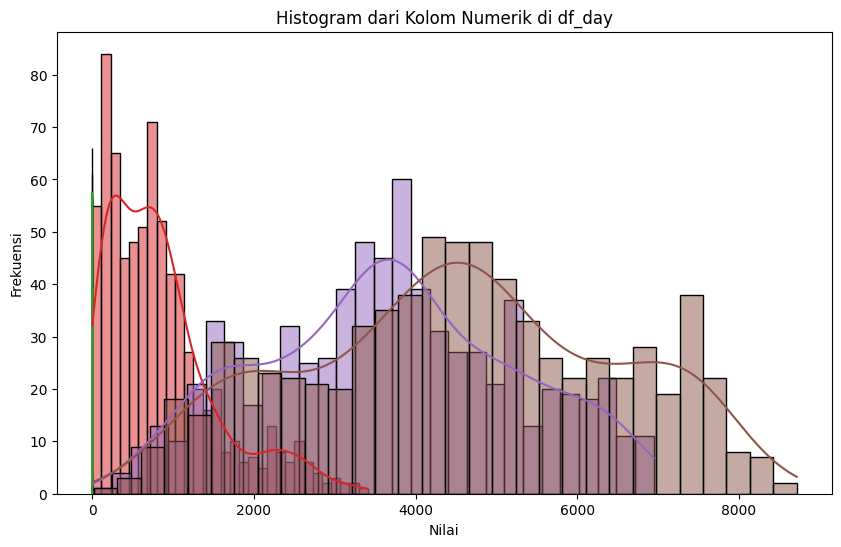

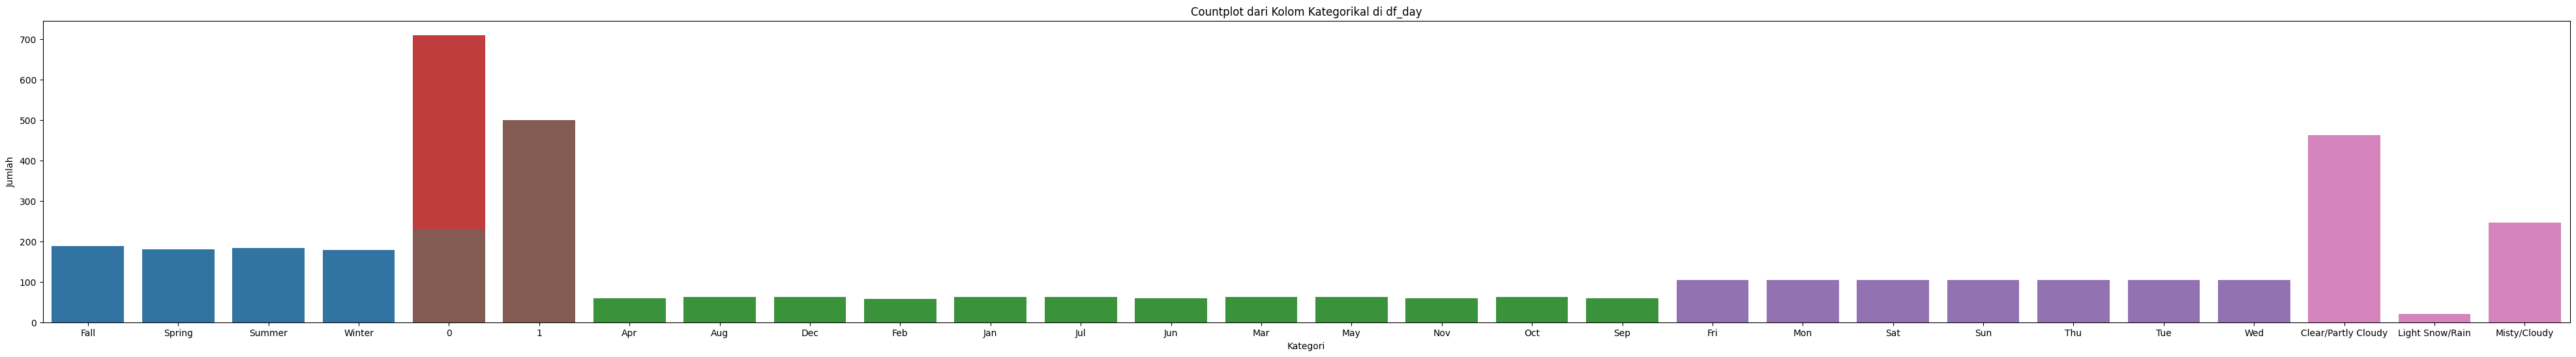

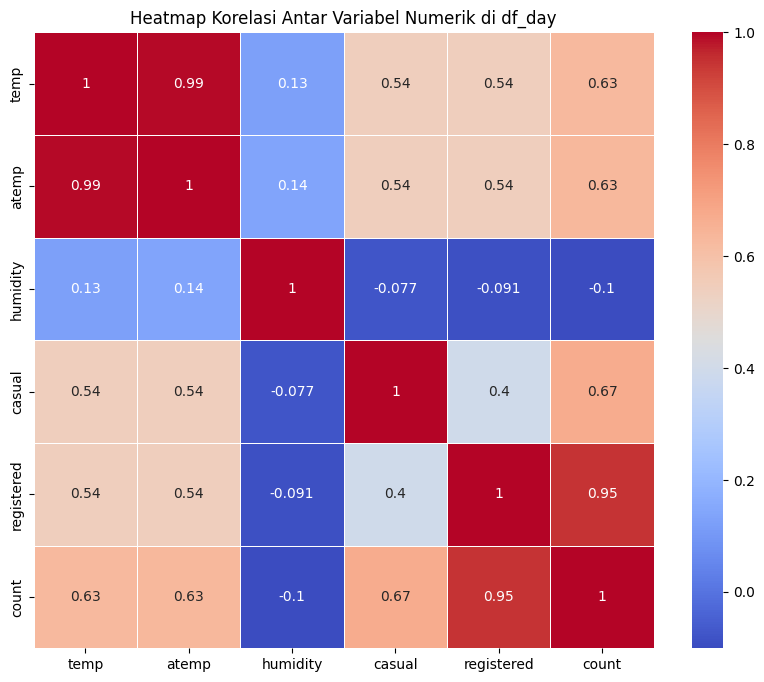

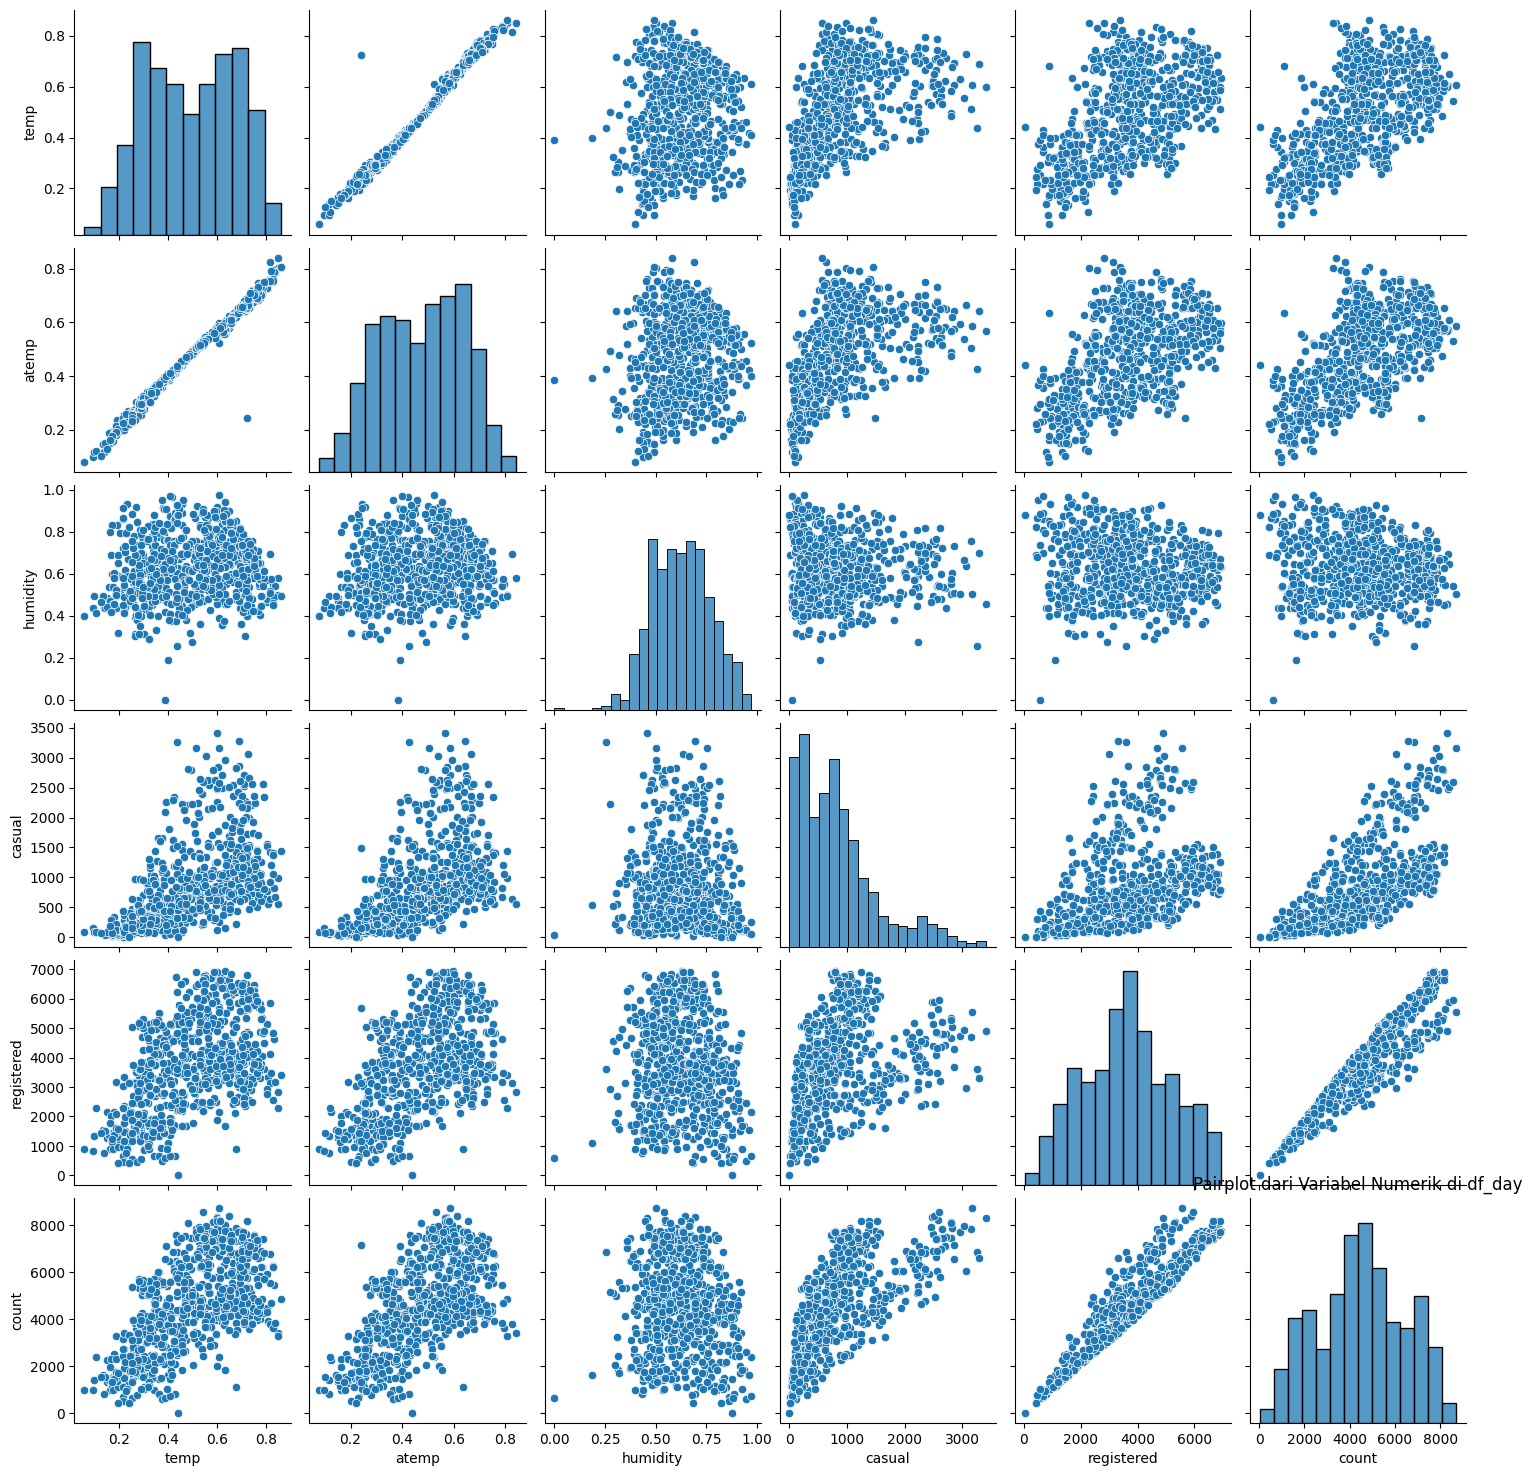

In [19]:
# Filter kolom dengan tipe data numerik (integer dan float)
numeric_columns = df_day.select_dtypes(include=['int', 'float']).columns

# Filter kolom dengan tipe data kategorikal (category)
category_columns = df_day.select_dtypes(include=['category']).columns

# EDA: Histogram untuk kolom numerik di df_day
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    sns.histplot(df_day[column], bins=30, kde=True)
plt.title('Histogram dari Kolom Numerik di df_day')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# EDA: Countplot untuk kolom kategorikal di df_day
plt.figure(figsize=(50, 6))
for column in category_columns:
    sns.countplot(x=column, data=df_day)
plt.title('Countplot dari Kolom Kategorikal di df_day')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

# EDA: Heatmap korelasi antar variabel numerik di df_day
plt.figure(figsize=(10, 8))
sns.heatmap(df_day[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik di df_day')
plt.show()

# EDA: Pairplot untuk melihat hubungan antar variabel numerik di df_day
sns.pairplot(df_day[numeric_columns])
plt.title('Pairplot dari Variabel Numerik di df_day')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana persebaran peminjaman sepeda (count) berdasarkan musim (season)?

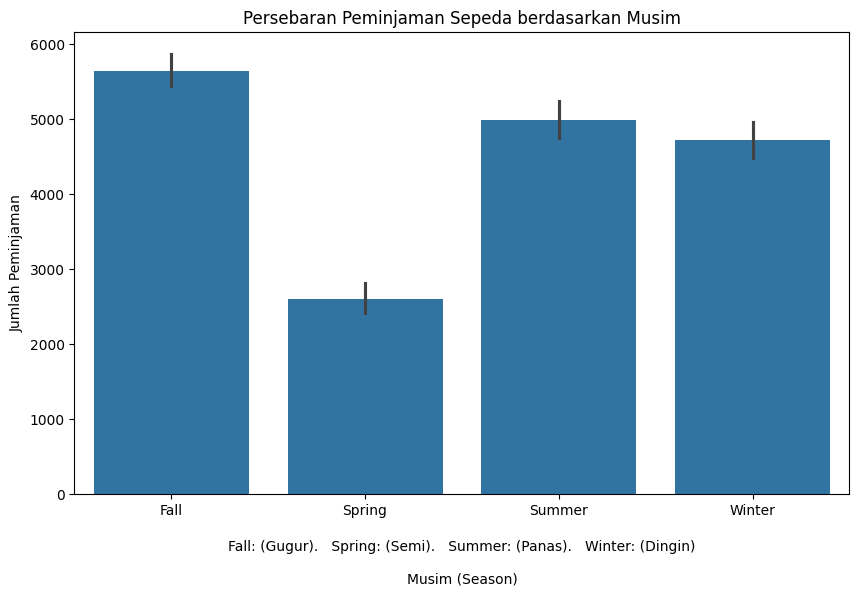


Barplot untuk melihat persebaran peminjaman sepeda berdasarkan musim:
        count         mean          std     min     25%     50%      75%  \
season                                                                     
Fall    188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
Spring  181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
Summer  184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
Winter  178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
season          
Fall    8714.0  
Spring  7836.0  
Summer  8362.0  
Winter  8555.0  


In [20]:
# Visualisasi: Barplot untuk melihat persebaran peminjaman sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=df_day)
plt.title('Persebaran Peminjaman Sepeda berdasarkan Musim')
plt.xlabel('\nFall: (Gugur).   Spring: (Semi).   Summer: (Panas).   Winter: (Dingin)\n\nMusim (Season)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

print("\nBarplot untuk melihat persebaran peminjaman sepeda berdasarkan musim:")
print(df_day.groupby('season')['count'].describe())


Kesimpulan:

 Secara keseluruhan, musim gugur (Fall) memiliki jumlah peminjaman sepeda tertinggi, diikuti oleh musim panas (Summer) dan musim dingin (Winter). Musim semi (Spring) memiliki jumlah peminjaman sepeda terendah. Variabilitas jumlah peminjaman juga cukup tinggi di semua musim, dengan beberapa pencilan yang menunjukkan hari-hari dengan jumlah peminjaman yang sangat rendah atau sangat tinggi.

### Pertanyaan 2:
Apakah ada korelasi antara suhu (temp) dan kelembaban udara (hum) dengan jumlah peminjaman sepeda (count)?

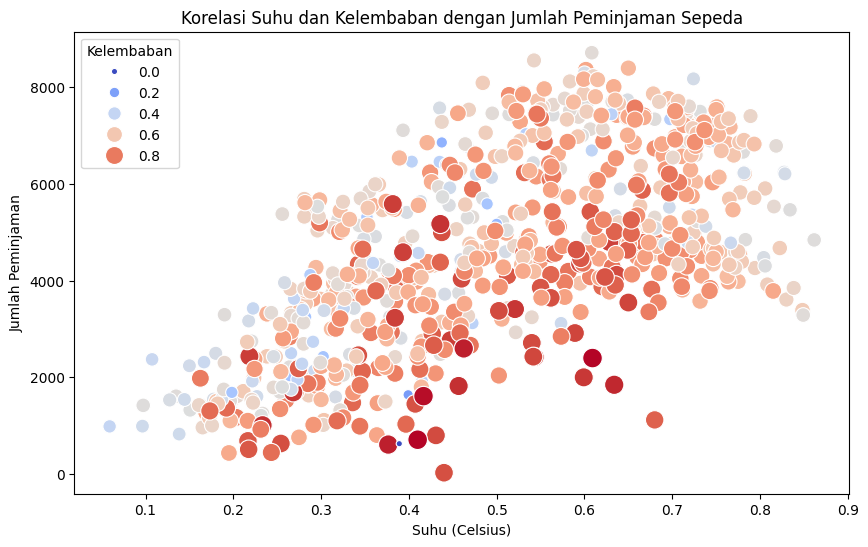


Scatter plot untuk melihat korelasi antara suhu dan kelembaban dengan jumlah peminjaman sepeda:
          count    mean  std     min     25%     50%     75%     max
humidity                                                            
0.000000    1.0   623.0  NaN   623.0   623.0   623.0   623.0   623.0
0.187917    1.0  1635.0  NaN  1635.0  1635.0  1635.0  1635.0  1635.0
0.254167    1.0  6857.0  NaN  6857.0  6857.0  6857.0  6857.0  6857.0
0.275833    1.0  5169.0  NaN  5169.0  5169.0  5169.0  5169.0  5169.0
0.290000    1.0  5102.0  NaN  5102.0  5102.0  5102.0  5102.0  5102.0
...         ...     ...  ...     ...     ...     ...     ...     ...
0.948261    1.0   605.0  NaN   605.0   605.0   605.0   605.0   605.0
0.949583    1.0  2594.0  NaN  2594.0  2594.0  2594.0  2594.0  2594.0
0.962500    1.0  1607.0  NaN  1607.0  1607.0  1607.0  1607.0  1607.0
0.970417    1.0   705.0  NaN   705.0   705.0   705.0   705.0   705.0
0.972500    1.0  2395.0  NaN  2395.0  2395.0  2395.0  2395.0  2395.0

[595 

In [28]:
# Visualisasi: Scatter plot untuk melihat korelasi antara suhu dan kelembaban dengan jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=df_day, hue='humidity', palette='coolwarm', size='humidity', sizes=(20, 200))
plt.title('Korelasi Suhu dan Kelembaban dengan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Kelembaban')
plt.show()

print("\nScatter plot untuk melihat korelasi antara suhu dan kelembaban dengan jumlah peminjaman sepeda:")
print(df_day.groupby('humidity')['count'].describe())


Kesimpulan:

 Dilihat dari scatter plot ini menunjukkan bahwa suhu memiliki korelasi positif yang signifikan dengan jumlah peminjaman sepeda, dan kelembaban juga tampaknya memiliki pengaruh tetapi mungkin tidak sekuat suhu.

## Conclusion

### Pertanyaan 1:
 Bagaimana persebaran peminjaman sepeda (count) berdasarkan musim (season)?

 - Secara keseluruhan, musim gugur (Fall) memiliki jumlah peminjaman sepeda tertinggi, diikuti oleh musim panas (Summer) dan musim dingin (Winter). Musim semi (Spring) memiliki jumlah peminjaman sepeda terendah. Variabilitas jumlah peminjaman juga cukup tinggi di semua musim, dengan beberapa pencilan yang menunjukkan hari-hari dengan jumlah peminjaman yang sangat rendah atau sangat tinggi.

### Pertanyaan 2:
 Apakah ada korelasi antara suhu (temp) dan kelembaban udara (hum) dengan jumlah peminjaman sepeda (count)?

 - Dilihat dari scatter plot ini menunjukkan bahwa suhu memiliki korelasi positif yang signifikan dengan jumlah peminjaman sepeda, dan kelembaban juga tampaknya memiliki pengaruh tetapi mungkin tidak sekuat suhu.

### 1. Clustering

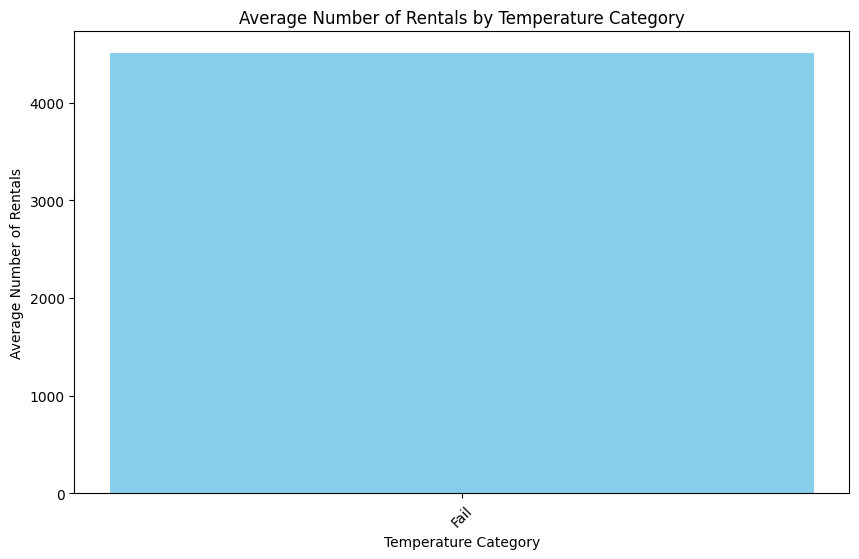

In [29]:
# Define bins for temperature
bins = [0, 1, 2, 3, 4]
labels = ['Fail', 'Spring', 'Summer', 'Winter']

# Create a new column 'temp_category' based on temperature bins
df_day['temp_category'] = pd.cut(df_day['temp'], bins=bins, labels=labels)

# Group by 'temp_category' and calculate mean count
clustered_data = df_day.groupby('temp_category')['count'].mean().reset_index()

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.bar(clustered_data['temp_category'], clustered_data['count'], color='skyblue')
plt.xlabel('Temperature Category')
plt.ylabel('Average Number of Rentals')
plt.title('Average Number of Rentals by Temperature Category')
plt.xticks(rotation=45)
plt.show()


### 2. RFM Analysis

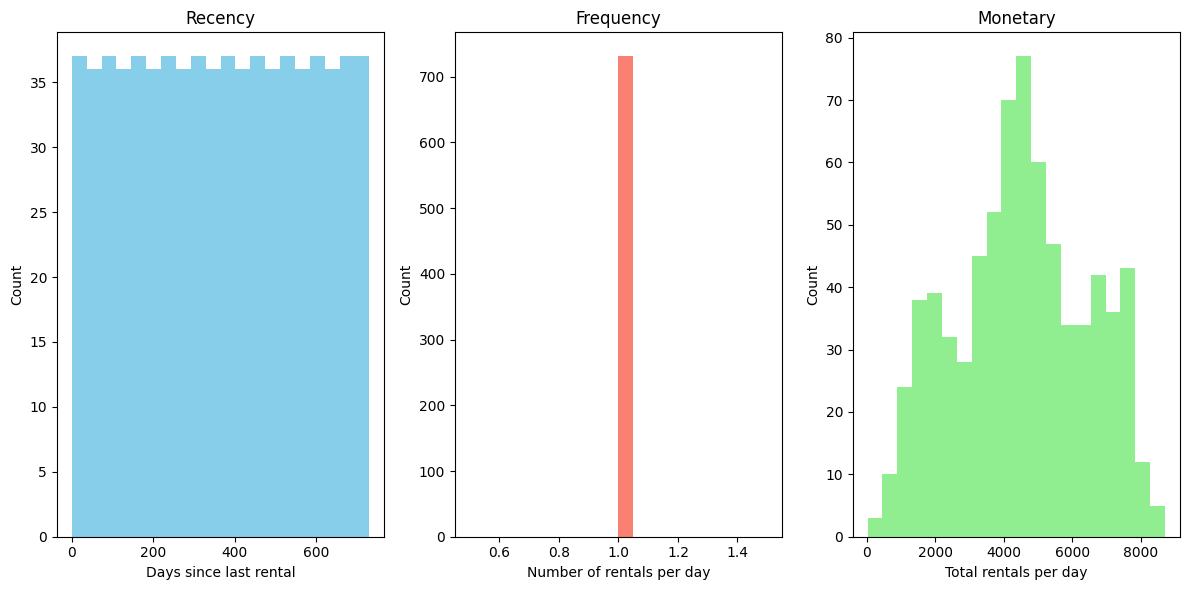

In [30]:
# Calculate Recency (R)
max_date = df_day['dateday'].max()
df_day['Recency'] = (max_date - df_day['dateday']).dt.days

# Calculate Frequency (F) and Monetary (M)
rfm_data = df_day.groupby('dateday').agg({
    'count': sum,                    # Monetary (M)
    'Recency': min,                # Recency (R)
    'dateday': 'count'            # Frequency (F)
}).rename(columns={
    'count': 'Monetary',
    'dateday': 'Frequency'
}).reset_index()

# Visualize RFM Analysis
plt.figure(figsize=(12, 6))

# Plot Recency
plt.subplot(1, 3, 1)
plt.hist(rfm_data['Recency'], bins=20, color='skyblue')
plt.title('Recency')
plt.xlabel('Days since last rental')
plt.ylabel('Count')

# Plot Frequency
plt.subplot(1, 3, 2)
plt.hist(rfm_data['Frequency'], bins=20, color='salmon')
plt.title('Frequency')
plt.xlabel('Number of rentals per day')
plt.ylabel('Count')

# Plot Monetary
plt.subplot(1, 3, 3)
plt.hist(rfm_data['Monetary'], bins=20, color='lightgreen')
plt.title('Monetary')
plt.xlabel('Total rentals per day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Additional Information (Dicoding Profile):

- User profile:
 - **Full name:** Aditya Dwi Nugraha
 - **Username:** aditya_dwi_10
 - **Email:** adityadwinugraha.2021@gmail.com

Submission/Project has been completed with all requirements.

Final Project: Data Analysis of Bike Sharing Data Set (Analisis Data Kumpulan Data Berbagi Sepeda)

Class: Belajar Analisis Data dengan Python

Bike Sharing Dataset: [
    "day.csv",
    "hour.csv"
]

Created by: Aditya Dwi Nugraha

© Copyright 2024 All Right Reserved by Aditya Dwi Nugraha